In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

C:\Users\sebas\AppData\Local\Temp\ipykernel_8276\3239019407.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# IMPORTANTO ARCHIVOS (CSV)

In [2]:
# Cargamos este archivo dataset

df_clean = pd.read_csv('cleaned_data.csv')

In [3]:
df_clean.dtypes

trending_date         object
channel_title         object
views                  int64
likes                  int64
dislikes               int64
comment_count          int64
comments_disabled       bool
ratings_disabled        bool
state                 object
lat                  float64
lon                  float64
geometry              object
Country               object
category_name         object
dtype: object

In [4]:
len(df_clean)

158700

In [5]:
df_clean.head(10)

,trending_date,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,state,lat,lon,geometry,Country,category_name
0,2017-11-13 18:30:00+00:00,Lokdhun Punjabi,1096327,33966,798,882,False,False,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878),IN,Film & Animation
1,2017-11-13 18:30:00+00:00,HJ NEWS,590101,735,904,0,True,False,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878),IN,News & Politics
2,2017-11-13 18:30:00+00:00,TFPC,473988,2011,243,149,False,False,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819),IN,Entertainment
3,2017-11-13 18:30:00+00:00,Eruma Saani,1242680,70353,1624,2684,False,False,Nagaland,25.666998,94.116570,POINT (94.11657019 25.6669979),IN,Comedy
4,2017-11-13 18:30:00+00:00,Filmylooks,464015,492,293,66,False,False,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545),IN,Entertainment
5,2017-11-13 18:30:00+00:00,Dil Raju,6106669,98612,4185,4763,False,False,Meghalaya,25.570492,91.880014,POINT (91.88001420000001 25.57049217),IN,Entertainment
6,2017-11-13 18:30:00+00:00,Speed Records,5718766,127477,7134,8063,False,False,Madhya Pradesh,21.300391,76.130019,POINT (76.13001949 21.30039105),IN,Music
7,2017-11-13 18:30:00+00:00,T-Series,10588371,132738,8812,10847,False,False,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545),IN,Music
8,2017-11-13 18:30:00+00:00,Top Telugu Media,118223,520,53,23,False,False,Andaman And Nicobar,11.667026,92.735983,POINT (92.73598262 11.66702557),IN,Entertainment
9,2017-11-13 18:30:00+00:00,Jump Cuts,969030,59798,1545,2404,False,False,Uttaranchal,30.320409,78.050006,POINT (78.05000565 30.32040895),IN,Entertainment


In [6]:
df_clean.rename(columns={'Country' : 'country'}, inplace=True)

In [7]:
df_clean.columns

Index(['trending_date', 'channel_title', 'views', 'likes', 'dislikes',
       'comment_count', 'comments_disabled', 'ratings_disabled', 'state',
       'lat', 'lon', 'geometry', 'country', 'category_name'],
      dtype='object')

Respondiendo las siguientes preguntas:

1.	¿Qué categorías de videos son las de mayor tendencia?

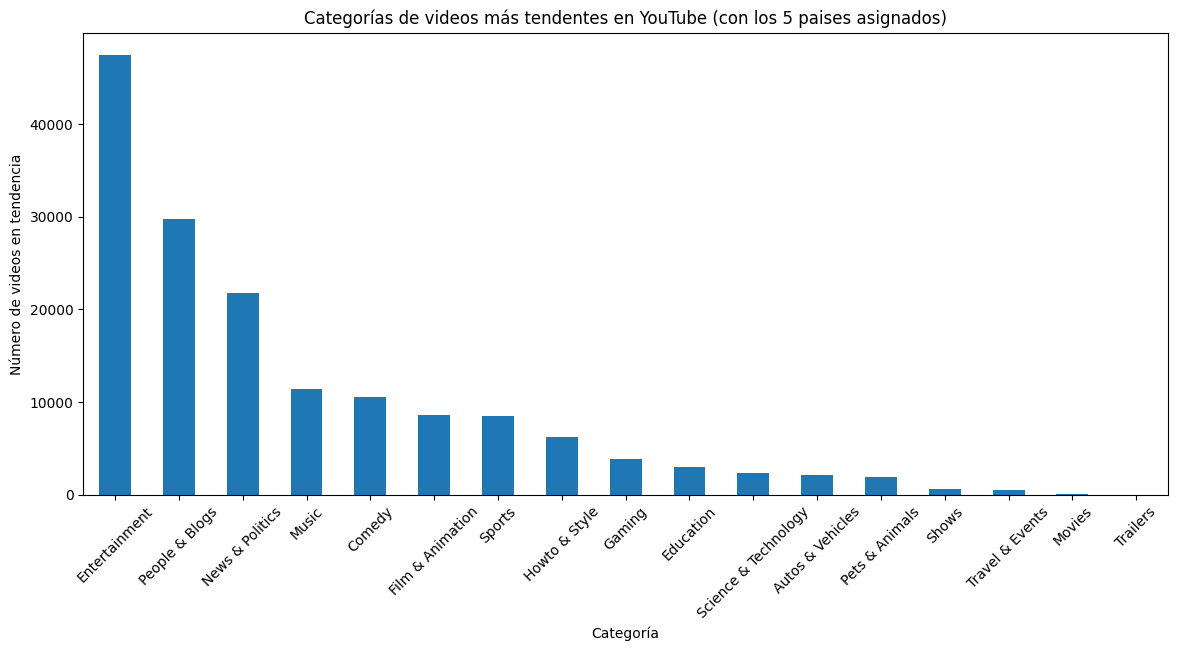

In [8]:
# Contar el número de videos en cada categoría
category_counts = df_clean['category_name'].value_counts()

# Cantidad de videos en tendencia por categoria
category_counts.value_counts().sum()

# Crear el gráfico de barras
plt.figure(figsize=(14, 6))
category_counts.plot(kind='bar')
plt.title('Categorías de videos más tendentes en YouTube (con los 5 paises asignados)')
plt.xlabel('Categoría')
plt.ylabel('Número de videos en tendencia')
plt.xticks(rotation=45)
plt.show()

In [9]:
# Agrupar por 'category_name' y contar el número de videos en cada categoría
category_counts = df_clean.groupby('category_name').size().reset_index(name='count')

# Ordenar los resultados para mayor claridad
category_counts = category_counts.sort_values(by='count', ascending=False)

# Mostrar tabla: categoria - cantidad de videos en tendencia
print('Cantidad de videos en tendencia por categoría')
category_counts

Cantidad de videos en tendencia por categoría


,category_name,count
3,Entertainment,47476
10,People & Blogs,29720
9,News & Politics,21798
8,Music,11408
1,Comedy,10572
4,Film & Animation,8597
14,Sports,8533
6,Howto & Style,6174
5,Gaming,3868
2,Education,2991


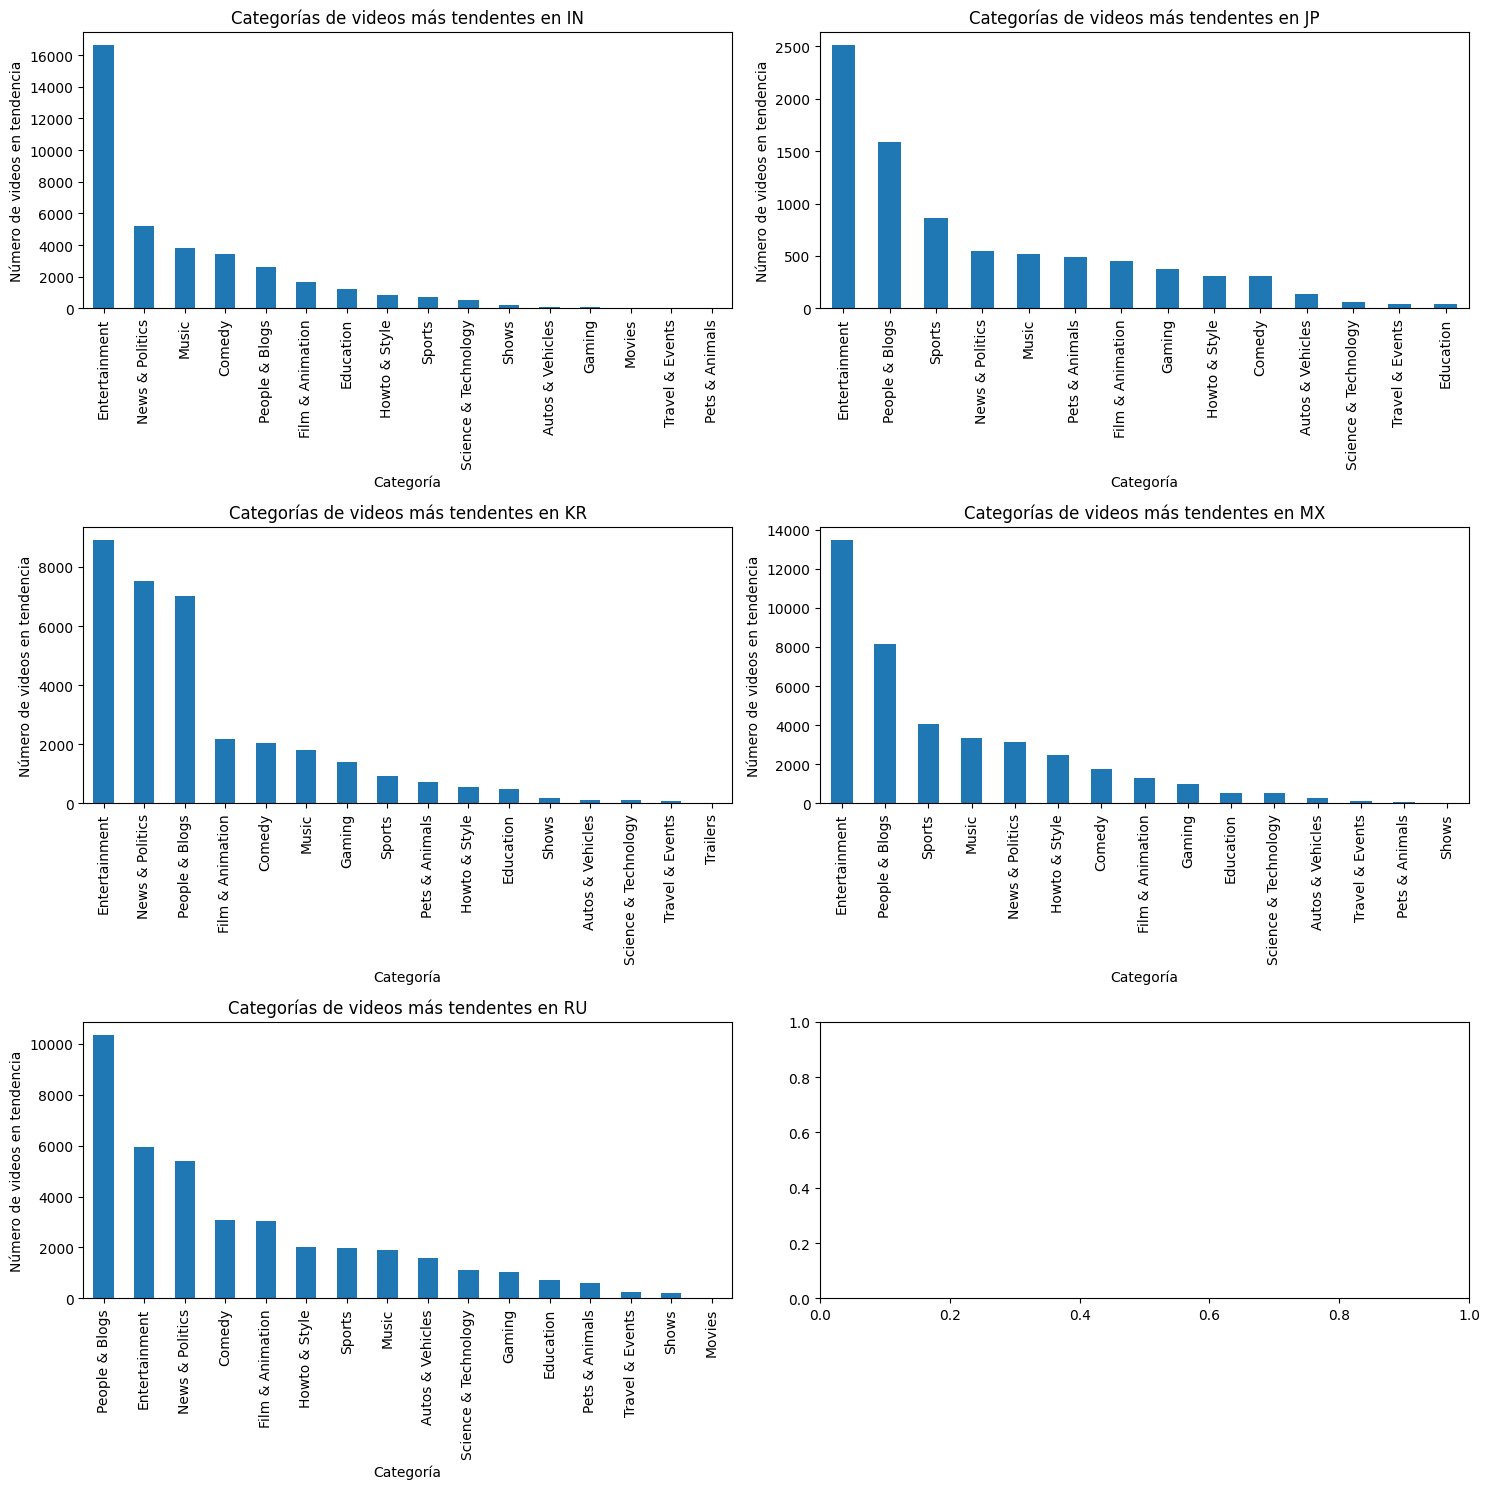

In [10]:
# Lista de países a analizar
countries = ['IN', 'JP', 'KR', 'MX', 'RU']

# Crear una figura con subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()

# Iterar sobre cada país y crear un gráfico de barras
for i, country in enumerate(countries):
    # Filtrar el dataframe por país
    df_country = df_clean[df_clean['country'] == country]
    
    # Contar el número de videos en cada categoría
    category_counts = df_country['category_name'].value_counts()
    
    # Crear el gráfico de barras en el subplot correspondiente
    category_counts.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Categorías de videos más tendentes en {country}')
    axes[i].set_xlabel('Categoría')
    axes[i].set_ylabel('Número de videos en tendencia')
    axes[i].tick_params(axis='x', rotation=90)

# Ajustar el layout para que no se sobrepongan los subplots
plt.tight_layout()
plt.show()

In [11]:
# Agrupar por 'country' y 'category_name' y contar el número de videos en cada combinación
category_country_counts = df_clean.groupby(['country', 'category_name']).size().reset_index(name='count')

# Crear la tabla pivote
pivot_table = category_country_counts.pivot_table(index='category_name', columns='country', values='count', fill_value=0)

# Mostrar tabla: categoria - cantidad de videos en tendencia
print('Cantidad de videos en tendencia por categoría y país')
pivot_table

Cantidad de videos en tendencia por categoría y país


country,IN,JP,KR,MX,RU
category_name,,,,,
Autos & Vehicles,72.0,138.0,119.0,252.0,1582.0
Comedy,3417.0,304.0,2045.0,1742.0,3064.0
Education,1220.0,42.0,483.0,532.0,714.0
Entertainment,16638.0,2513.0,8912.0,13471.0,5942.0
Film & Animation,1641.0,449.0,2180.0,1292.0,3035.0
Gaming,66.0,380.0,1386.0,994.0,1042.0
Howto & Style,845.0,309.0,556.0,2466.0,1998.0
Movies,15.0,0.0,0.0,0.0,1.0
Music,3837.0,523.0,1791.0,3362.0,1895.0


2. ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?

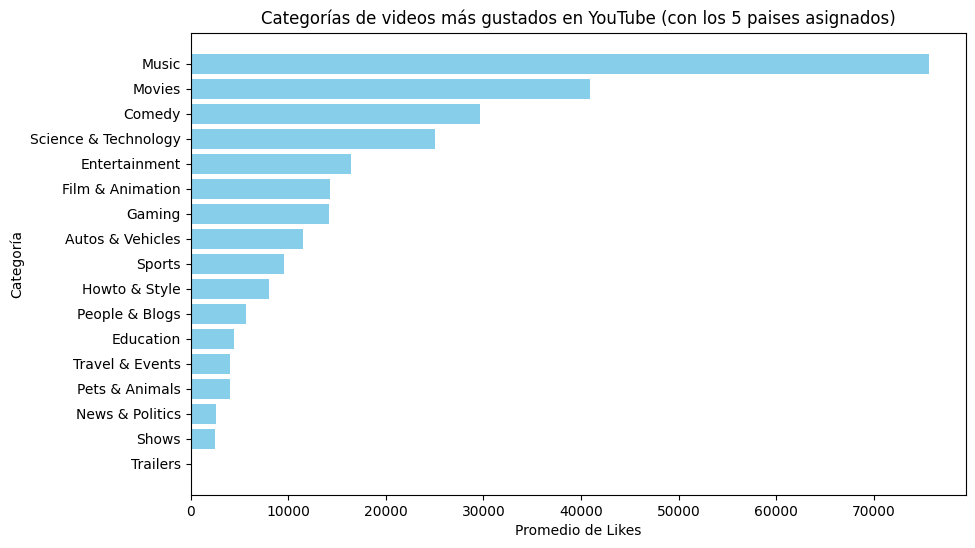

In [12]:
# Agrupar por 'category_name' y calcular el promedio de "likes" para cada categoría
category_likes = df_clean.groupby('category_name')['likes'].mean().reset_index()

# Ordenar las categorías por el promedio de "likes" en orden descendente
category_likes = category_likes.sort_values(by='likes', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(category_likes['category_name'], category_likes['likes'], color='skyblue')
plt.xlabel('Promedio de Likes')
plt.ylabel('Categoría')
plt.title('Categorías de videos más gustados en YouTube (con los 5 paises asignados)')
plt.gca().invert_yaxis()  # Invertir el eje y para tener la categoría más gustada en la parte superior
plt.show()

In [13]:
# Agrupar por 'category_name' y sumar los "likes" para cada categoría
category_likes = df_clean.groupby('category_name')['likes'].mean().reset_index()

# Ordenar las categorías por el número total de "likes" en orden descendente
category_likes = category_likes.sort_values(by='likes', ascending=False)

# Mostrar la tabla
print('Categorías mas gustadas')
category_likes

Categorías mas gustadas


,category_name,likes
8,Music,75630.279278
7,Movies,40940.437500
1,Comedy,29672.441827
12,Science & Technology,24996.800420
3,Entertainment,16443.106917
4,Film & Animation,14263.576131
5,Gaming,14129.958118
0,Autos & Vehicles,11545.068423
14,Sports,9557.882808
6,Howto & Style,8070.530126


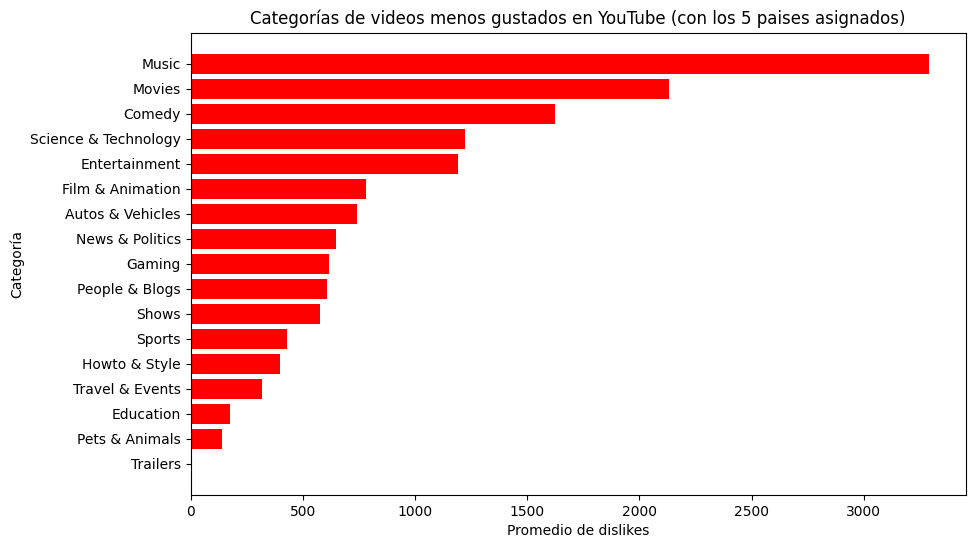

In [14]:
# Agrupar por 'category_name' y calcular el promedio de "dislikes" para cada categoría
category_dislikes = df_clean.groupby('category_name')['dislikes'].mean().reset_index()

# Ordenar las categorías por el promedio de "dislikes" en orden descendente
category_dislikes = category_dislikes.sort_values(by='dislikes', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(category_dislikes['category_name'], category_dislikes['dislikes'], color='red')
plt.xlabel('Promedio de dislikes')
plt.ylabel('Categoría')
plt.title('Categorías de videos menos gustados en YouTube (con los 5 paises asignados)')
plt.gca().invert_yaxis()  # Invertir el eje y para tener la categoría menos gustada en la parte superior
plt.show()

In [15]:
# Agrupar por 'category_name' y sumar los "dislikes" para cada categoría
category_dislikes = df_clean.groupby('category_name')['dislikes'].mean().reset_index()

# Ordenar las categorías por el número total de "dislikes" en orden descendente
category_dislikes = category_dislikes.sort_values(by='dislikes', ascending=False)

# Mostrar la tabla
print('Categorías menos gustadas')
category_dislikes

Categorías menos gustadas


,category_name,dislikes
8,Music,3290.008152
7,Movies,2131.125000
1,Comedy,1624.718502
12,Science & Technology,1223.245798
3,Entertainment,1193.512217
4,Film & Animation,780.790974
0,Autos & Vehicles,739.906611
9,News & Politics,650.075053
5,Gaming,616.111686
10,People & Blogs,606.138762


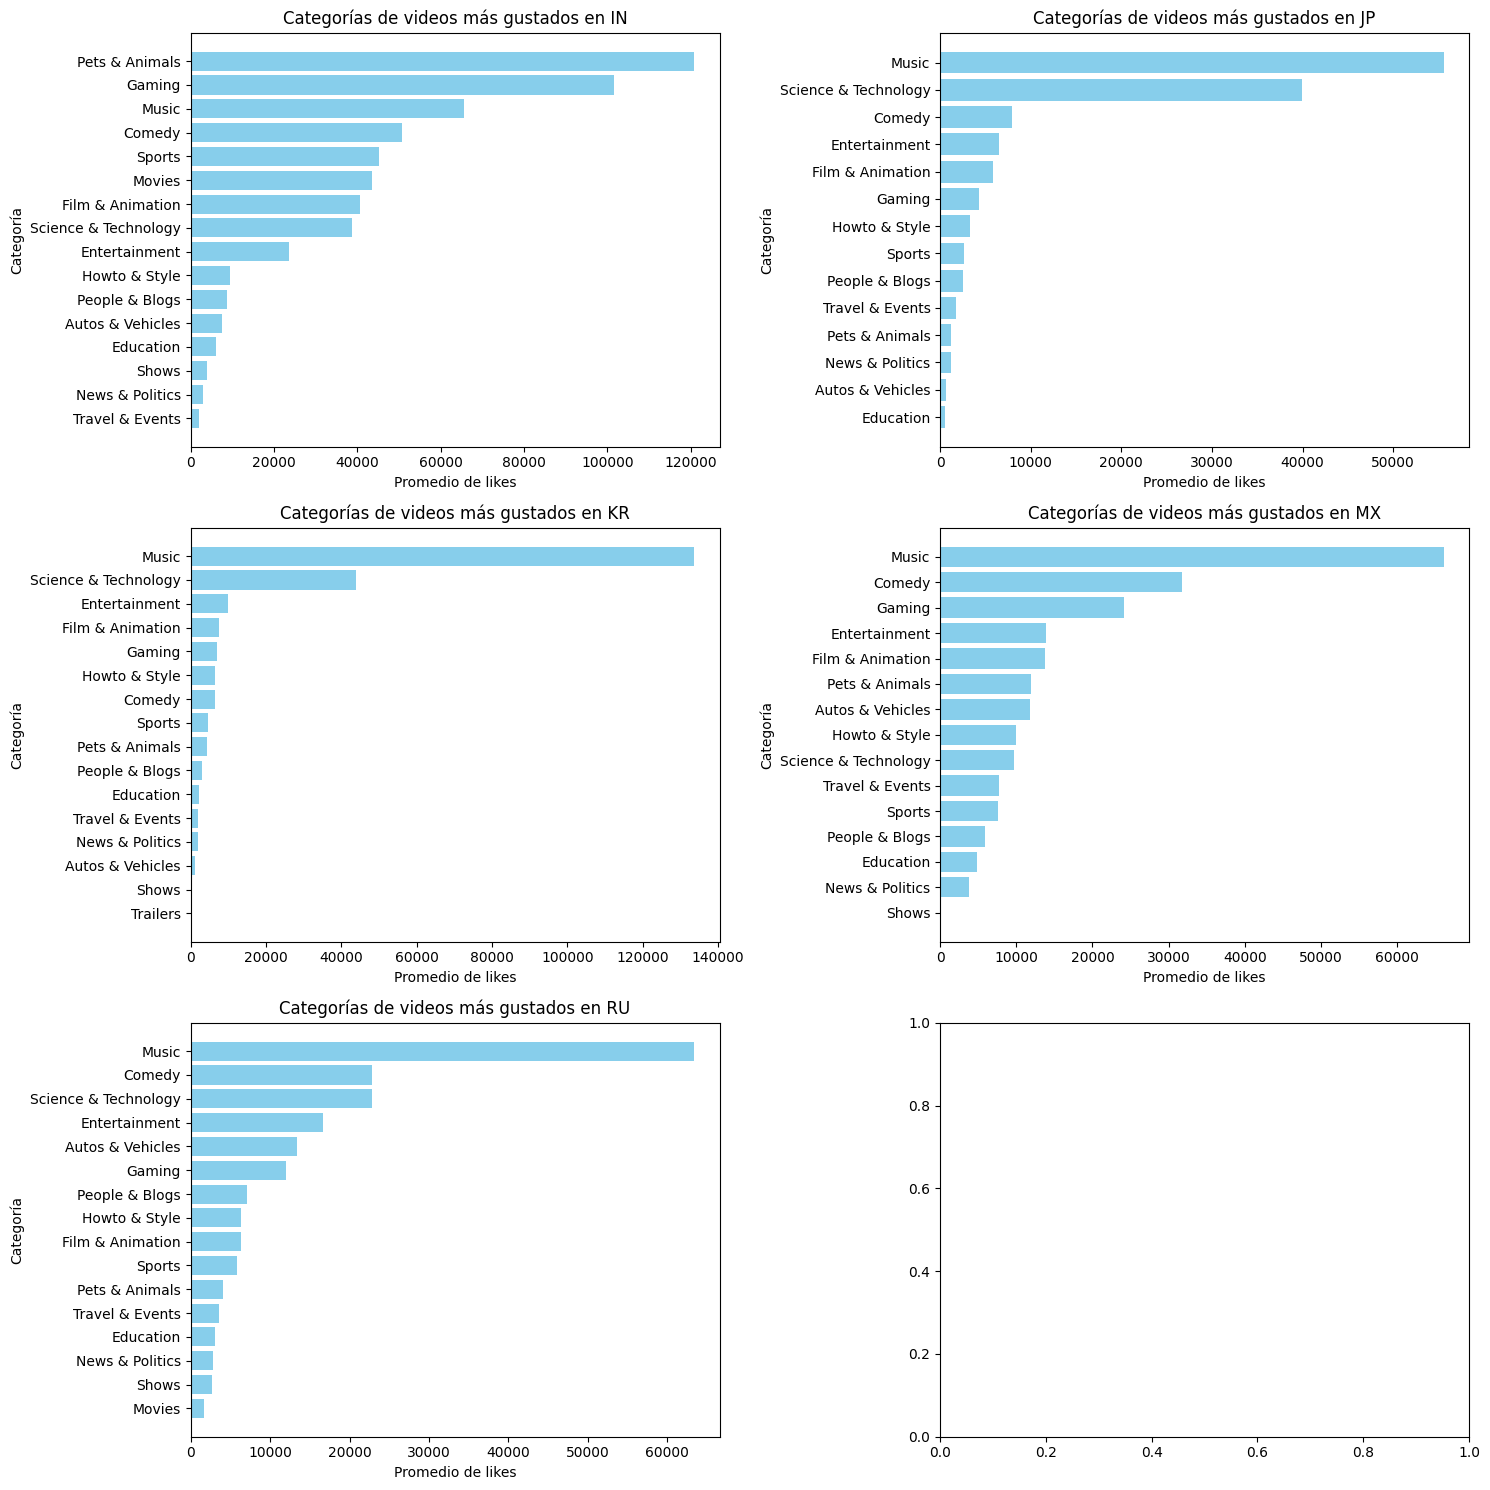

In [16]:
# Crear una figura con subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()

# Iterar sobre cada país y crear un gráfico de barras
for i, country in enumerate(countries):
    # Filtrar el dataframe por país
    df_country = df_clean[df_clean['country'] == country]
    
    # Contar el número de likes por categorsía
    # Agrupar por 'category_name' y calcular el promedio de "likes" para cada categoría
    category_likes = df_country.groupby('category_name')['likes'].mean().reset_index()

    # Ordenar las categorías por el promedio de "likes" en orden descendente
    category_likes = category_likes.sort_values(by='likes', ascending=False)
    
    # Crear el gráfico de barras en el subplot correspondiente
    axes[i].barh(category_likes['category_name'], category_likes['likes'], color='skyblue')
    axes[i].set_title(f'Categorías de videos más gustados en {country}')
    axes[i].set_xlabel('Promedio de likes')
    axes[i].set_ylabel('Categoría')
    axes[i].invert_yaxis()
    axes[i].tick_params(axis='x', rotation=0)

# Ajustar el layout para que no se sobrepongan los subplots
plt.tight_layout()
plt.show()

In [17]:
# Agrupar por 'country' y 'category_name' y sumar los "likes" para cada combinación
category_country_likes = df_clean.groupby(['country', 'category_name'])['likes'].sum().reset_index()

# Crear la tabla pivote
pivot_table = category_country_likes.pivot_table(index='category_name', columns='country', values='likes', fill_value=0)

# Mostrar tabla
print('Categorías más gustadas por país:')
pivot_table

Categorías más gustadas por país:


country,IN,JP,KR,MX,RU
category_name,,,,,
Autos & Vehicles,539571.0,90655.0,150135.0,2980893.0,21210729.0
Comedy,173017843.0,2396436.0,13048017.0,55273506.0,69961253.0
Education,7433283.0,21344.0,1114527.0,2550632.0,2190395.0
Entertainment,390954130.0,16314008.0,87991881.0,186492867.0,98900058.0
Film & Animation,66645872.0,2604758.0,16437535.0,17849565.0,19086234.0
Gaming,6707728.0,1636055.0,9769082.0,24002503.0,12539310.0
Howto & Style,7889210.0,1009926.0,3585273.0,24638031.0,12705013.0
Movies,653315.0,0.0,0.0,0.0,1732.0
Music,251773291.0,29071988.0,239438731.0,222376265.0,120129951.0


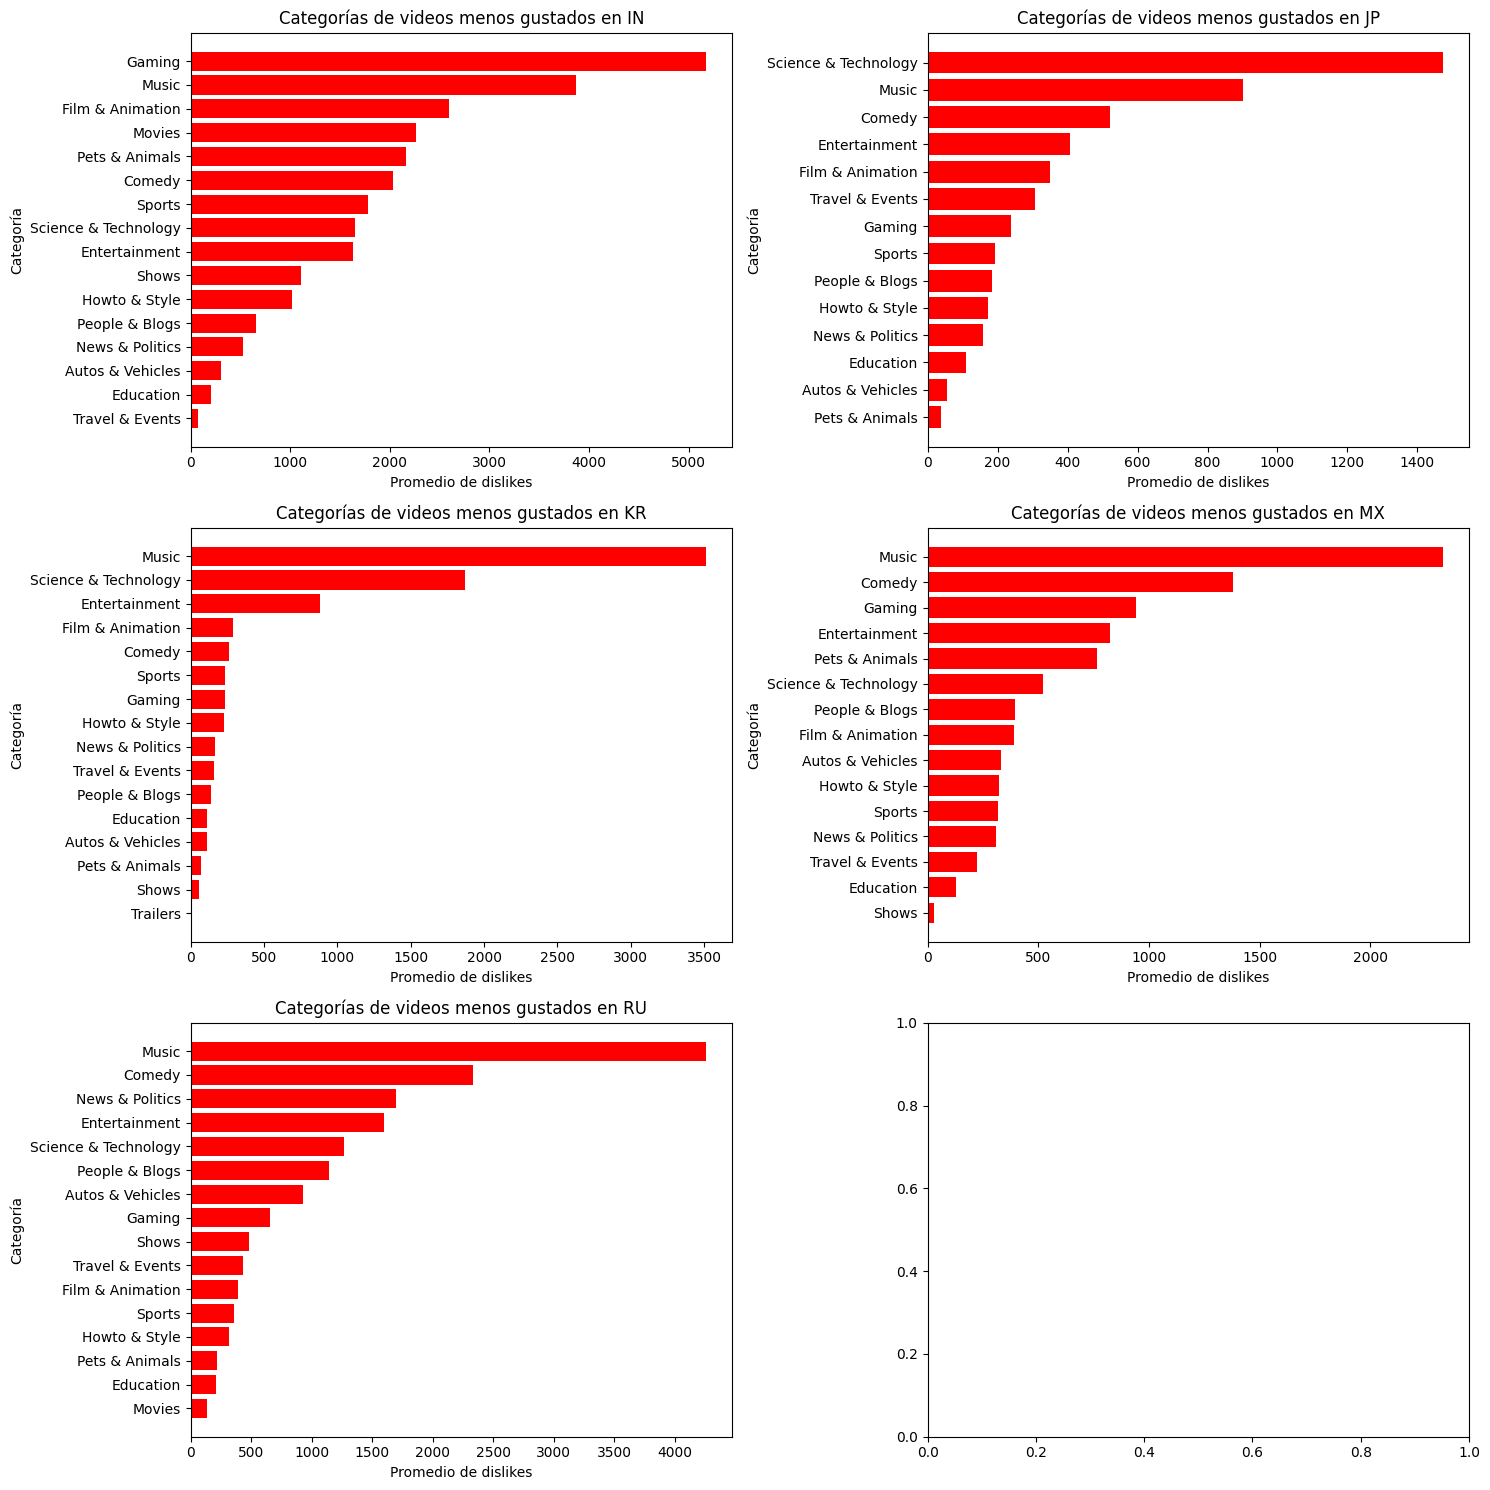

In [18]:
# Crear una figura con subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()

# Iterar sobre cada país y crear un gráfico de barras
for i, country in enumerate(countries):
    # Filtrar el dataframe por país
    df_country = df_clean[df_clean['country'] == country]
    
    # Contar el número de likes por categorsía
    # Agrupar por 'category_name' y calcular el promedio de "dislikes" para cada categoría
    category_dislikes = df_country.groupby('category_name')['dislikes'].mean().reset_index()

    # Ordenar las categorías por el promedio de "dislikes" en orden descendente
    category_dislikes = category_dislikes.sort_values(by='dislikes', ascending=False)
    
    # Crear el gráfico de barras en el subplot correspondiente
    axes[i].barh(category_dislikes['category_name'], category_dislikes['dislikes'], color='red')
    axes[i].set_title(f'Categorías de videos menos gustados en {country}')
    axes[i].set_xlabel('Promedio de dislikes')
    axes[i].set_ylabel('Categoría')
    axes[i].invert_yaxis()
    axes[i].tick_params(axis='x', rotation=0)

# Ajustar el layout para que no se sobrepongan los subplots
plt.tight_layout()
plt.show()

In [19]:
# Agrupar por 'country' y 'category_name' y sumar los "dislikes" para cada combinación
category_country_likes = df_clean.groupby(['country', 'category_name'])['dislikes'].mean().reset_index()

# Crear la tabla pivote
pivot_table = category_country_likes.pivot_table(index='category_name', columns='country', values='dislikes', fill_value=0)

# Mostrar tabla
print('Categorías menos gustadas por país:')
pivot_table

Categorías menos gustadas por país:


country,IN,JP,KR,MX,RU
category_name,,,,,
Autos & Vehicles,309.500000,54.869565,109.773109,332.349206,931.572061
Comedy,2028.417032,521.549342,259.590709,1378.121699,2335.287533
Education,200.956557,110.452381,111.055901,126.706767,207.897759
Entertainment,1633.134271,407.928372,881.329668,826.373617,1595.335746
Film & Animation,2590.327849,349.169265,287.351376,390.202786,386.947941
Gaming,5176.000000,239.381579,235.966811,943.902414,657.629559
Howto & Style,1017.523077,172.491909,227.868705,321.285888,316.400400
Movies,2264.000000,0.000000,0.000000,0.000000,138.000000
Music,3873.439406,902.363289,3514.582915,2330.182927,4258.256992
